# Deep Learning for Computer Vision:  HW 1


## Computer Science: COMS W 4995 005


### Due: September 19, 2024

#### Problem 1  (50%)

Let's start with a two class classification problem. You are asked to

1. Create your own dataset using real data. This data can be found by you online or gathered and measured by you. You are not to use datasets that others have put together, instead you are looking for raw data for a two class classification problem. The data does not have to come from images, but it is ok if it does. The data should contain 100 or more samples (more is better) from each class and the features should be at least 2 dimensional. It is ok to use Python libs, e.g. OpenCV, to extract features from your raw data. And it is ok if the labels for the classes are given by the data, or you can annotate this data yourself. 

2. Divide this data up into a training set (80%) and a test set (20%). Experiment with plotting this data in some of the raw feature dimensions much like we did in class. Hand-draw possible classifiers in these plots. 

3. Compute the prior for both classes from the data you gathered. Or if you do not believe you can determine this, assume both classes are equally likely. If you only have a couple of features, you can try to fit to a multivariate Gaussian class conditional density functions--this simply means you need to find the sample mean and sample covariance matrix for both classes from the samples. Alternatively, you can use a naive Bayes algorithm that assumes each feature is independent. But again assume a Gaussian distribution for each and find the joint probability as the product of the per feature probabilities. Plot the decision boundary for a minimum error-rate classifier assuming your fits are correct. Are these good fits to your data? How does this decision boundary differ from the one you drew by hand?

To make things more consistent, let's all use the same notation.  Let the class conditional density functions (or likelihoods) be given by $\rho({\bf x}|y_i)$ where ${\bf x}$ is your feature and $y_i$ specifies the class. Let's also assume that the priors $P(y_i)$ are the same for both classes. Hint: you can find the decision boundary by densely generating sample points ${\bf x}_j \in X$ according to your ccd's, classifying them, and then plotting and coloring them according to their predicted label.

Remember all you need to do is to use Bayes theorem to get the expression for $P(y_i|{\bf x})$, then for each sample ${\bf x}_j \in X$ choose the $i$ with the highest aposteriori probability. Do not use any statisical packages to do this other than numpy to fit to your Gaussian distribution(s).

## Brief explanation and following structure:
- I will use humidity and sea level pressure to identify if the day is sunny or not. The forecast was part of the initial raw data, but was processed into a binary sunny or not. The humidity and sea level pressure has also be normalized between 0 and 1 with respect to the year of 2015 in NYC. The raw humidity and sea level pressure is with respect to the typical scientific sliding scale and continous.
- It's worth noting that the accuracy for both accuracy figures are the same, This is likely due to the training data and test data are all from the year of 2015 from NYC with no drastic changes in the humidity and sea level pressure throughout the year. The datas are split into 80% training 20% test as per requested by the assignment.
1) Import training data
2) Graph 2 dimensional data of humidity and sea level on scatter graph and hand-draw decision boundary
3) Generate bayes boundary
4) Generate accuracy
5) Import test data
6) Plot scatter graph on the same bayes boundary from step 3
7) Generate accuracy 

## Link to data
https://drive.google.com/drive/folders/1Y_IUvrpNJi5gdBnyQbpYRqoC3YB4PO6y?usp=sharing

##### Part 1

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

In [33]:
df = pd.read_csv(r'C:\Users\Rosh\Desktop\all\Columbia\classes\Y4S1\DL_for_CV\hw1.ipynb\raw_data\weather\training-data.csv', encoding='ISO-8859-1')

df.head()

,SN,Date,Mean.Humidity,Mean.Sea.Level.PressureIn,Mean.VisibilityMiles,CloudCover,Normalized water pressure,Normalized visiblity,normalized cloudcover,normalized humidity,Sunny or not,Events,Normalized dew point
0,22435,1/4/2010,53,29.71,10,4,0.417143,1.0,0.500,0.413333,Sunny,Sunny,0.238636
1,22436,1/5/2010,53,29.73,10,4,0.428571,1.0,0.500,0.413333,Sunny,Sunny,0.261364
2,22437,1/6/2010,52,29.73,10,5,0.428571,1.0,0.625,0.400000,Sunny,Sunny,0.295455
3,22438,1/7/2010,59,29.87,10,4,0.508571,1.0,0.500,0.493333,Sunny,Sunny,0.375000
4,22440,1/9/2010,45,30.06,10,0,0.617143,1.0,0.000,0.306667,Sunny,Sunny,0.181818


In [34]:
# sunny_elements = []
# sunny_pressure = df.loc[df['Sunny or not'] == 'Sunny','Normalized water pressure']
# sunny_humidity = df.loc[df['Sunny or not'] == 'Sunny','normalized humidity']

# not_sunny_elements = []
# not_sunny_pressure = df.loc[df['Sunny or not'] == 'Not Sunny','Normalized water pressure']
# not_sunny_humidity = df.loc[df['Sunny or not'] == 'Not Sunny','normalized humidity']

df_selected = df[['Normalized water pressure', 'normalized humidity']]

df['sunny?'] = (df['Sunny or not'] == 'Sunny').astype(int) # Sunny = 1, not sunny = 0

print(df_selected.head())

   Normalized water pressure  normalized humidity
0                   0.417143             0.413333
1                   0.428571             0.413333
2                   0.428571             0.400000
3                   0.508571             0.493333
4                   0.617143             0.306667


##### Part 2

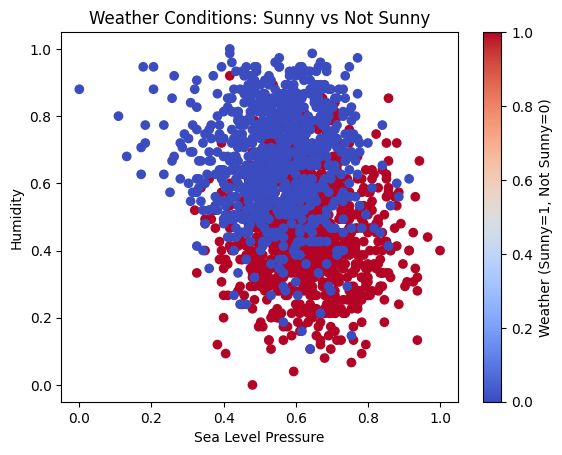

In [35]:
# Scatter plot
plt.scatter(df['Normalized water pressure'], df['normalized humidity'], c=df['sunny?'], cmap='coolwarm')
plt.xlabel('Sea Level Pressure')
plt.ylabel('Humidity')
plt.title('Weather Conditions: Sunny vs Not Sunny')
plt.colorbar(label='Weather (Sunny=1, Not Sunny=0)')
plt.show()


![Drawing](raw_data\weather\hand_drawn.png)

##### Part 3

In [36]:
# Generate apriori 
sunny_count = len(df[df['sunny?'] == 1])
not_sunny_count = len(df[df['sunny?'] == 0])
total_count = len(df)

prior_sunny = sunny_count / total_count
prior_not_sunny = not_sunny_count / total_count

print(f'Prior Sunny: {prior_sunny}, Prior Not Sunny: {prior_not_sunny}')

Prior Sunny: 0.5622914349276974, Prior Not Sunny: 0.43770856507230255


In [37]:
# Find mean and variances
mean_pressure_sunny = df[df['sunny?'] == 1]['Normalized water pressure'].mean()
var_pressure_sunny = df[df['sunny?'] == 1]['Normalized water pressure'].var()

mean_pressure_not_sunny = df[df['sunny?'] == 0]['Normalized water pressure'].mean()
var_pressure_not_sunny = df[df['sunny?'] == 0]['Normalized water pressure'].var()

mean_humidity_sunny = df[df['sunny?'] == 1]['normalized humidity'].mean()
var_humidity_sunny = df[df['sunny?'] == 1]['normalized humidity'].var()

mean_humidity_not_sunny = df[df['sunny?'] == 0]['normalized humidity'].mean()
var_humidity_not_sunny = df[df['sunny?'] == 0]['normalized humidity'].var()


In [38]:
# gaussian function with reference to stackoverflow
def gaussian_pdf(x, mean, var):
    """Computes the Gaussian probability density function for a given x, mean, and variance."""
    # Standard deviation is the square root of the variance
    std_dev = np.sqrt(var)
    
    # Compute the probability density
    coefficient = 1 / (std_dev * np.sqrt(2 * np.pi))
    exponent = np.exp(-0.5 * ((x - mean) ** 2) / var)
    
    return coefficient * exponent

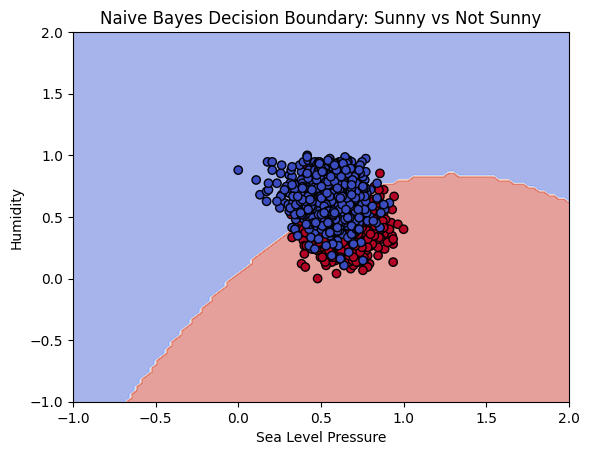

In [39]:
# Create a meshgrid over the feature space
x_min, x_max = df['Normalized water pressure'].min() - 1, df['Normalized water pressure'].max() + 1
y_min, y_max = df['normalized humidity'].min() - 1, df['normalized humidity'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict the class for each point in the meshgrid
Z = np.zeros(xx.shape)
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        # Compute posterior for each point in the grid
        x1 = xx[i, j]
        x2 = yy[i, j]
        # Compute likelihoods and posteriors (Sunny and Not Sunny)
        P_sunny = (prior_sunny * gaussian_pdf(x1, mean_pressure_sunny, var_pressure_sunny)
                   * gaussian_pdf(x2, mean_humidity_sunny, var_humidity_sunny))
        P_not_sunny = (prior_not_sunny * gaussian_pdf(x1, mean_pressure_not_sunny, var_pressure_not_sunny)
                       * gaussian_pdf(x2, mean_humidity_not_sunny, var_humidity_not_sunny))

        # Assign class based on posterior probabilities
        Z[i, j] = 1 if P_sunny > P_not_sunny else 0

# Plot decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
plt.scatter(df['Normalized water pressure'], df['normalized humidity'], c=df['sunny?'], edgecolors='k', cmap='coolwarm')
plt.xlabel('Sea Level Pressure')
plt.ylabel('Humidity')
plt.title('Naive Bayes Decision Boundary: Sunny vs Not Sunny')
plt.show()


In [40]:
# prediction function part with reference to stackoverflow

# Assuming df_test is your test DataFrame with features and labels
X_test = df[['Normalized water pressure', 'normalized humidity']]
y_test = (df['Sunny or not'] == 'Sunny').astype(int)  # Assuming 'Sunny' is your target column

# Make predictions on the test set
y_pred = []
for _, row in X_test.iterrows():
    x1, x2 = row['Normalized water pressure'], row['normalized humidity']
    P_sunny = (prior_sunny * gaussian_pdf(x1, mean_pressure_sunny, var_pressure_sunny)
               * gaussian_pdf(x2, mean_humidity_sunny, var_humidity_sunny))
    P_not_sunny = (prior_not_sunny * gaussian_pdf(x1, mean_pressure_not_sunny, var_pressure_not_sunny)
                   * gaussian_pdf(x2, mean_humidity_not_sunny, var_humidity_not_sunny))
    y_pred.append(1 if P_sunny > P_not_sunny else 0)

# Compute accuracy
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model on training data accuracy: {accuracy:.2f}")

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 

##### Test data

In [41]:
df_test = pd.read_csv(r'C:\Users\Rosh\Desktop\all\Columbia\classes\Y4S1\DL_for_CV\hw1.ipynb\raw_data\weather\test-data.csv', encoding='ISO-8859-1')

df_test.head()

,SN,Date,Mean.Humidity,Mean.Sea.Level.PressureIn,Mean.VisibilityMiles,CloudCover,Normalized water pressure,Normalized visiblity,normalized cloudcover,normalized humidity,Sunny or not,Events,Normalized dew point
0,22446,1/15/2010,64,30.15,10,6,0.623457,1.0,0.750,0.544118,Sunny,Sunny,0.431818
1,22447,1/16/2010,59,30.17,10,6,0.635802,1.0,0.750,0.470588,Sunny,Sunny,0.443182
2,22460,1/29/2010,36,30.26,10,3,0.691358,1.0,0.375,0.132353,Sunny,Sunny,0.102273
3,22470,2/8/2010,46,29.96,10,0,0.506173,1.0,0.000,0.279412,Sunny,Sunny,0.272727
4,22476,2/14/2010,54,29.61,10,5,0.290123,1.0,0.625,0.397059,Sunny,Sunny,0.340909


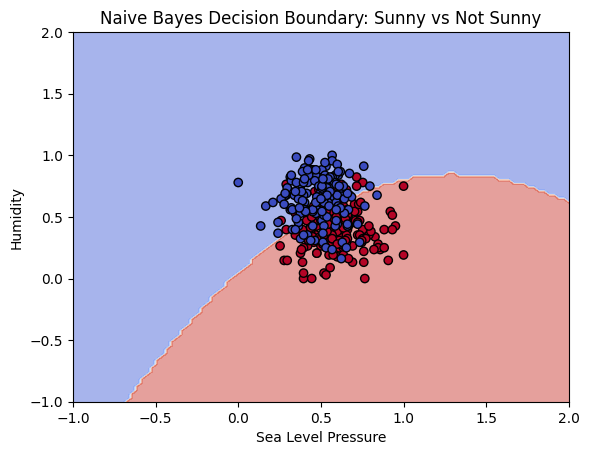

In [42]:
df_test_selected = df_test[['Normalized water pressure', 'normalized humidity']]

df_test['sunny?'] = (df_test['Sunny or not'] == 'Sunny').astype(int) # Sunny = 1, not sunny = 0 into "sunny?" column

# Create a meshgrid over the feature space
x_min, x_max = df_test['Normalized water pressure'].min() - 1, df_test['Normalized water pressure'].max() + 1
y_min, y_max = df_test['normalized humidity'].min() - 1, df_test['normalized humidity'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict the class for each point in the meshgrid
Z = np.zeros(xx.shape)
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        # Compute posterior for each point in the grid
        x1 = xx[i, j]
        x2 = yy[i, j]
        # Compute likelihoods and posteriors (Sunny and Not Sunny)
        P_sunny = (prior_sunny * gaussian_pdf(x1, mean_pressure_sunny, var_pressure_sunny)
                   * gaussian_pdf(x2, mean_humidity_sunny, var_humidity_sunny))
        P_not_sunny = (prior_not_sunny * gaussian_pdf(x1, mean_pressure_not_sunny, var_pressure_not_sunny)
                       * gaussian_pdf(x2, mean_humidity_not_sunny, var_humidity_not_sunny))

        # Assign class based on posterior probabilities
        Z[i, j] = 1 if P_sunny > P_not_sunny else 0

# Plot decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
plt.scatter(df_test['Normalized water pressure'], df_test['normalized humidity'], c=df_test['sunny?'], edgecolors='k', cmap='coolwarm')
plt.xlabel('Sea Level Pressure')
plt.ylabel('Humidity')
plt.title('Naive Bayes Decision Boundary: Sunny vs Not Sunny')
plt.show()


In [43]:
# Assuming df_test is your test DataFrame with features and labels
X_test = df_test[['Normalized water pressure', 'normalized humidity']]
y_test = (df_test['Sunny or not'] == 'Sunny').astype(int)  # Assuming 'Sunny' is your target column

# Make predictions on the test set
y_pred = []
for _, row in X_test.iterrows():
    x1, x2 = row['Normalized water pressure'], row['normalized humidity']
    P_sunny = (prior_sunny * gaussian_pdf(x1, mean_pressure_sunny, var_pressure_sunny)
               * gaussian_pdf(x2, mean_humidity_sunny, var_humidity_sunny))
    P_not_sunny = (prior_not_sunny * gaussian_pdf(x1, mean_pressure_not_sunny, var_pressure_not_sunny)
                   * gaussian_pdf(x2, mean_humidity_not_sunny, var_humidity_not_sunny))
    y_pred.append(1 if P_sunny > P_not_sunny else 0)

# Compute accuracy 
# Ensure that the length of y_test and y_pred match
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model on test data accuracy: {accuracy:.2f}")


[1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

#### Problem 2  (25%)

Research an application for computer vision, describe the underlying problem and the methods used to solve it. If the application was presented in popular media (e.g., NY Times), track down the scientific methods used in the academic literature. Include references. It is ok if this is related to what you are thinking about for your final project! This write-up should be a two to three pages including images and diagrams as needed. 

https://docs.google.com/document/d/1Q7blcodFuG4TCIUn-LoRy3pXviycy6P9DfQLxIlR6vQ/edit?usp=sharing

#### Problem 3  (25%)

Revisit Problem 2 above. Imagine that you had to build this application yourself. Using internet searches, seek out existing pre-trained deep learning models and describe how you might use these to build a ML pipeline for your use-case. Consider GitHub, Huggingface, and tech blogs and model zoos from some of the big AI companies. Include references.


https://docs.google.com/document/d/1Q7blcodFuG4TCIUn-LoRy3pXviycy6P9DfQLxIlR6vQ/edit?usp=sharing